In [82]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

# Задача 1 + 2

Сгенерируем выборку $X_1, X_2, \dots X_{N}$, N = 100 из распределения $P_{\theta}$.
Построим доверительные интервалы уровня $\alpha = 0.95$ для всех $n \leq N$, изобразим на графике в координатах $(n, \theta)$. Будем брать $\theta$ равным 10. 

Оценим вероятность попадания в интервал. Для этого сгенерируем M = 10000 выборок размера N и посмотрим, сколько из них попадают в интервал.

In [83]:
N = 100
alpha = 0.95
theta = 10
M = 10000

In [84]:
def draw_plot(sample, left_border, right_border, start = 0, ylims = None): 
    plt.figure(figsize = (12, 6))
    x = np.arange(start, N)
    low = [left_border(sample[:n + 1]) for n in range(N)]
    top = [right_border(sample[:n + 1]) for n in range(N)]
    plt.fill_between(x, low[start:], top[start:], label='Доверительный интервал')
    plt.plot(x, np.zeros(len(x)) + theta, 'r', label=r'истинное значение $\theta$')
    if ylims:
        plt.ylim(ylims[0], ylims[1])
    plt.legend(loc = 'best')
    plt.xlabel('n')
    plt.ylabel(r'$\theta$')
    plt.title(r'Доверительный интервал уровня доверия $\alpha = 0.95$ для параметра $\theta$')
    plt.show();

In [85]:
def interval_probability(distrib, left_border, right_border):
    count = 0
    for _ in range(M):
        sample = distrib.rvs(size = N)
        count += (left_border(sample) <= theta <= right_border(sample))
    print('Вероятность попадания в интервал: {}'.format(count / M))

### Равномерное распределение

Сгенерируем выборку из $U[0, \theta]$.

In [86]:
distrib = sps.uniform(loc = 0, scale = theta)
sample = distrib.rvs(size = N)

Возьмем статистику $\overline{X}$, тогда доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ равен 

$\left(\frac{\overline{X}}{\frac{1}{2} + \frac{1}{\sqrt{12 n (1 - \alpha)}}}, 
\frac{\overline{X}}{\frac{1}{2} - \frac{1}{\sqrt{12 n (1 - \alpha)}}}\right)$. 

Посчитаем левую и правую границы для всех n, выкинув маленькие значения, при которых интервал получается неточным.

In [87]:
def f(n):
    return (12 * (n + 1) * (1 - alpha)) ** (-0.5)

def left_border(sample):
    return np.mean(sample) / (0.5 + f(len(sample)))

def right_border(sample):
    return np.mean(sample) / (0.5 - f(len(sample)))

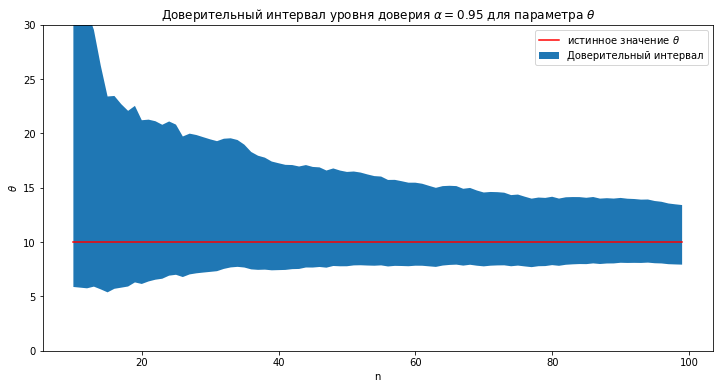

Вероятность попадания в интервал: 1.0


In [88]:
draw_plot(sample, left_border, right_border, 10, [0, 30])
interval_probability(distrib, left_border, right_border)

### Распределение Коши
Сгенерируем выборку из $Cauchy(\theta)$

In [89]:
theta = 10
distrib = sps.cauchy(loc = theta)
sample = distrib.rvs(size = N)

Асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ равен:

$\left(\hat{\mu} - \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}, 
\hat{\mu} + \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}\right)$

$\hat{\mu}$ - выборочная медиана, $u_{\frac{1 + \alpha}{2}}$ квантиль берется по стандартному нормальному распределению $N(0, 1)$.

Из табличных данных $u_{\frac{1 + \alpha}{2}} = u_{0.975} = 1.96$.

In [90]:
quantile = 1.96

In [91]:
def left_border(sample):
    return np.median(sample) - (np.pi * quantile) / (2 * (len(sample) ** 0.5))

def right_border(sample):
    return np.median(sample) + (np.pi * quantile) / (2 * (len(sample) ** 0.5))

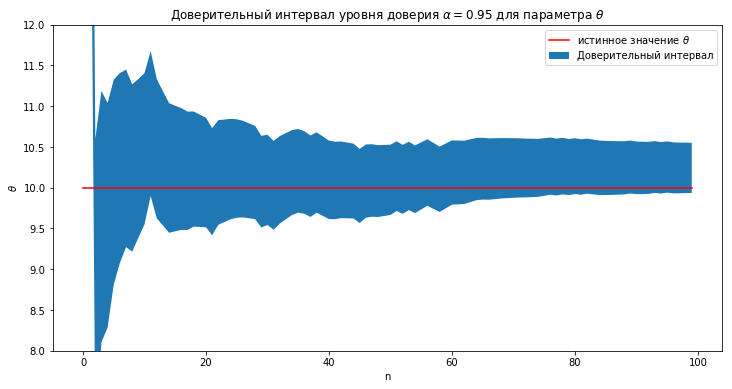

Вероятность попадания в интервал: 0.9472
None


In [92]:
draw_plot(sample, left_border, right_border, ylims = [8, 12])
interval_probability(distrib, left_border, right_border)

### Пуассоновское распределение
Сгенерируем выборку из $Pois(\theta)$

In [93]:
distrib = sps.poisson(mu = theta)
sample = distrib.rvs(size = N)

Доверительный интеграл равен
$\left(\overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\overline{X} + \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right)$.
Квантиль берется по стандартному распределению.

In [94]:
quantile = 1.96

In [95]:
def left_border(sample):
    mean = np.mean(sample)
    return mean - quantile * (mean / len(sample)) ** 0.5

def right_border(sample):
    mean = np.mean(sample)
    return mean + quantile * (mean / len(sample)) ** 0.5

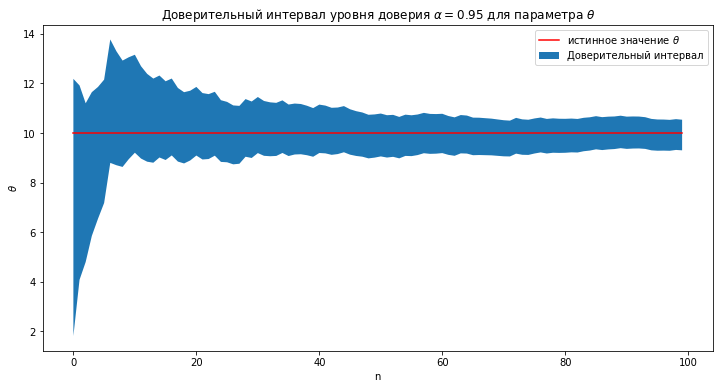

Вероятность попадания в интервал: 0.9485


In [96]:
draw_plot(sample, left_border, right_border)
interval_probability(distrib, left_border, right_border)

### Гамма-распределение
Сгенерируем выборку из $\Gamma(\theta, \lambda), \lambda = 3$ 

In [97]:
lambda_ = 3
distrib = sps.gamma(a = theta, scale = 1 / lambda_)
sample = distrib.rvs(size = N)

Доверительный интервал равен 
$\left(\lambda \overline{X} - \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\lambda \overline{X} + \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right)$,
квантиль, как обычно, из стандартного нормального распределения.

In [98]:
quantile = 1.96

In [99]:
def left_border(sample):
    mean = np.mean(sample)
    return lambda_ * mean - quantile * (lambda_ * mean / len(sample)) ** 0.5

def right_border(sample):
    mean = np.mean(sample)
    return lambda_ * mean + quantile * (lambda_ * mean / len(sample)) ** 0.5

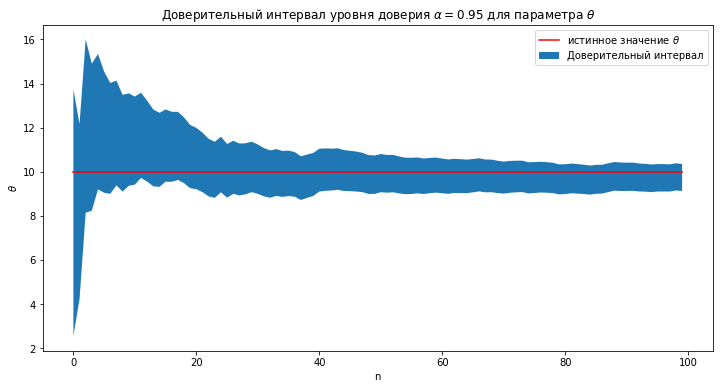

Вероятность попадания в интервал: 0.952


In [100]:
draw_plot(sample, left_border, right_border)
interval_probability(distrib, left_border, right_border)